In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [2]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.0 MB/s 
     |████████████████████████████████| 88 kB 5.7 MB/s 
     |████████████████████████████████| 96 kB 5.4 MB/s 
     |████████████████████████████████| 11.2 MB 50.7 MB/s 
     |████████████████████████████████| 965 kB 74.9 MB/s 
     |████████████████████████████████| 1.1 MB 54.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=3d16693cd1d0945cd20d4ac8c099c1060cc653adaa5c36dfa14f0f929d815dea
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=0dc26ed611c1d7cdb49a873957bddc3b524f379978a8bf86450240872f4f88c3
  Stored in directory: /root/.cache/pip/wheels/19/bc/eb/974072a56a7082a302f8

In [2]:
import json as json
import matplotlib.pyplot as plt
import numpy as np
import os as os
import pandas as pd
import scanpy as sc

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.12.2 pynndescent==0.5.8


In [4]:
adata = sc.read_h5ad("./drive/MyDrive/immune_cell_dataset/myeloid/myeloid.h5ad")
adata.X.shape

(51552, 36601)

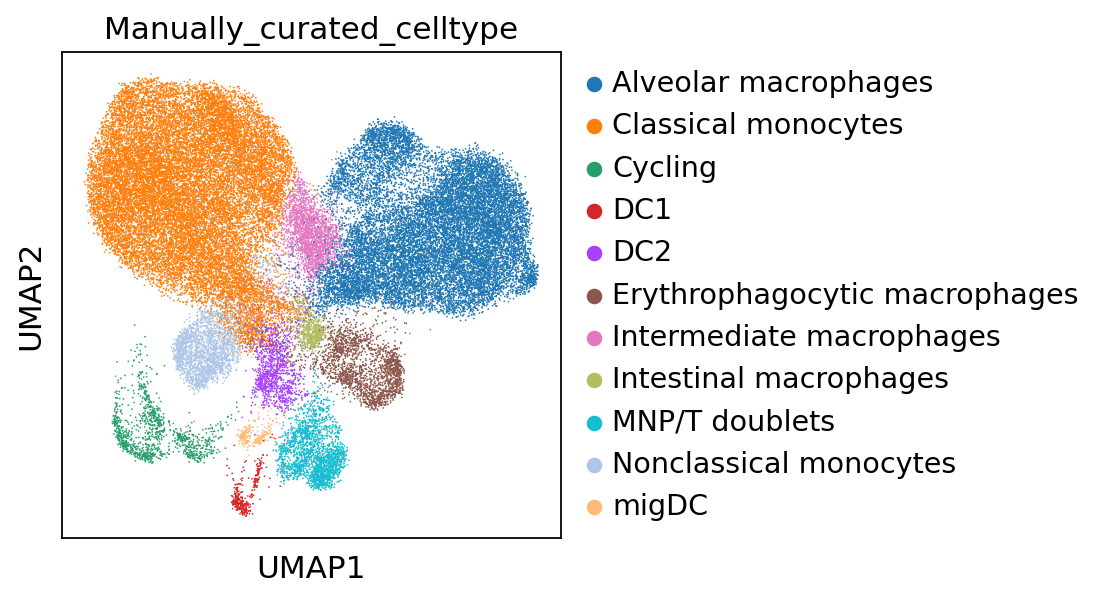

In [5]:
sc.pl.umap(adata, color='Manually_curated_celltype', use_raw=False)

In [6]:
adata.X

<51552x36601 sparse matrix of type '<class 'numpy.float32'>'
	with 144809505 stored elements in Compressed Sparse Row format>

In [7]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

Directory for writing results to

In [8]:
!mkdir figures

Preprocessing

I skipped a lot of steps because the umap included all 329762 cells.

The matrix has already been normalized and logarithmized.

Selecting Highly Variable Genes

In [9]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [10]:
print("Number of non-highly variable genes:", sum(adata.var['highly_variable']==False))

myeloid_genes = ["CD74",
                 "HLA-DRA",
                 "CLEC9A",
                 "DNASE1L3",
                 "IDO1",
                 "XCR1",
                 "CLEC10A",
                 "CD1C",
                 "PKIB",
                 "FSCN1",
                 "LAMP3",
                 "CCR7",
                 "CD14",
                 "FCGR3A",
                 "C1QA",
                 "CRISPLD2",
                 "CLU",
                 "MARC1",
                 "CDKN1C",
                 "ZNF703",
                 "CX3CR1",
                 "GPNMB",
                 "TREM2",
                 "BHLHE41",
                 "TNIP3",
                 "CCL2",
                 "SPP1",
                 "SELENOP",
                 "CD5L",
                 "SPIC",
                 "SLC40A1",
                 "VCAM1",
                 "CXCL12",
                 "CD209",
                 "SDS",
                 "IGF1",
                 "MKI67",
                 "CD3E"]
print("Number of highly variable genes:", sum(adata.var["highly_variable"]==True))
print("Number of myeloid genes:", len(myeloid_genes))

special_myeloid_genes = {"GPNMB": ("macrophage", "alveolar"),
                         "TREM2": ("macrophage", "alveolar"),
                         "TNIP3": ("macrophage", "intermediate"),
                         "CCL2": ("macrophage", "intermediate"),
                         "CD5L": ("macrophage", "erythrophagocytic"),
                         "SLC40A1": ("macrophage", "erythrophagocytic"),
                         "SPIC": ("macrophage", "erythrophagocytic"),
                         "CD209": ("macrophage", "gut"),
                         "IGF1": ("macrophage", "gut"),
                         "CD14": ("monocyte", "classical"),
                         "FCGR3A": ("monocyte", "nonclassical"),
                         "CX3CR1": ("monocyte", "nonclassical"),
                         "XCR1": ("dendritic", "DC1"),
                         "CLEC9A": ("dendritic", "DC1"),
                         "CD1C": ("dendritic", "DC2"),
                         "CLEC10A": ("dendritic", "DC2"),
                         "CCR7": ("dendritic", "migDC"),
                         "LAMP3": ("dendritic", "migDC"),
                         "AIRE": ("dendritic", "migDC"),
                         "PDLIM4": ("dendritic", "migDC"),
                         "EBI3": ("dendritic", "migDC"),
                         "CRLF2": ("dendritic", "migDC")}

# for gene in myeloid_genes:
  # print(adata.var["highly_variable"][gene])

for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    print(gene + " mentioned in description of myeloid subset but not shown in chart")
    print(gene + " associated with ", special_myeloid_genes[gene])

Number of non-highly variable genes: 34785
Number of highly variable genes: 1816
Number of myeloid genes: 38
AIRE mentioned in description of myeloid subset but not shown in chart
AIRE associated with  ('dendritic', 'migDC')
PDLIM4 mentioned in description of myeloid subset but not shown in chart
PDLIM4 associated with  ('dendritic', 'migDC')
EBI3 mentioned in description of myeloid subset but not shown in chart
EBI3 associated with  ('dendritic', 'migDC')
CRLF2 mentioned in description of myeloid subset but not shown in chart
CRLF2 associated with  ('dendritic', 'migDC')


In [11]:
present = []
absent = []
for gene in myeloid_genes:
  if adata.var["highly_variable"][gene]:
    present.append(gene)
  else:
    absent.append(gene)

for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    print(gene + " not present in myeloid_genes")
    if adata.var["highly_variable"][gene]:
      present.append(gene)
    else:
      absent.append(gene)

print("Number of genes present:", len(present))
print("Number of genes absent:", len(absent))
print("Genes absent:", absent)

for gene in absent:
  if gene in special_myeloid_genes:
    print(gene, special_myeloid_genes[gene])

AIRE not present in myeloid_genes
PDLIM4 not present in myeloid_genes
EBI3 not present in myeloid_genes
CRLF2 not present in myeloid_genes
Number of genes present: 36
Number of genes absent: 6
Genes absent: ['CD74', 'HLA-DRA', 'CD14', 'C1QA', 'AIRE', 'CRLF2']
CD14 ('monocyte', 'classical')
AIRE ('dendritic', 'migDC')
CRLF2 ('dendritic', 'migDC')


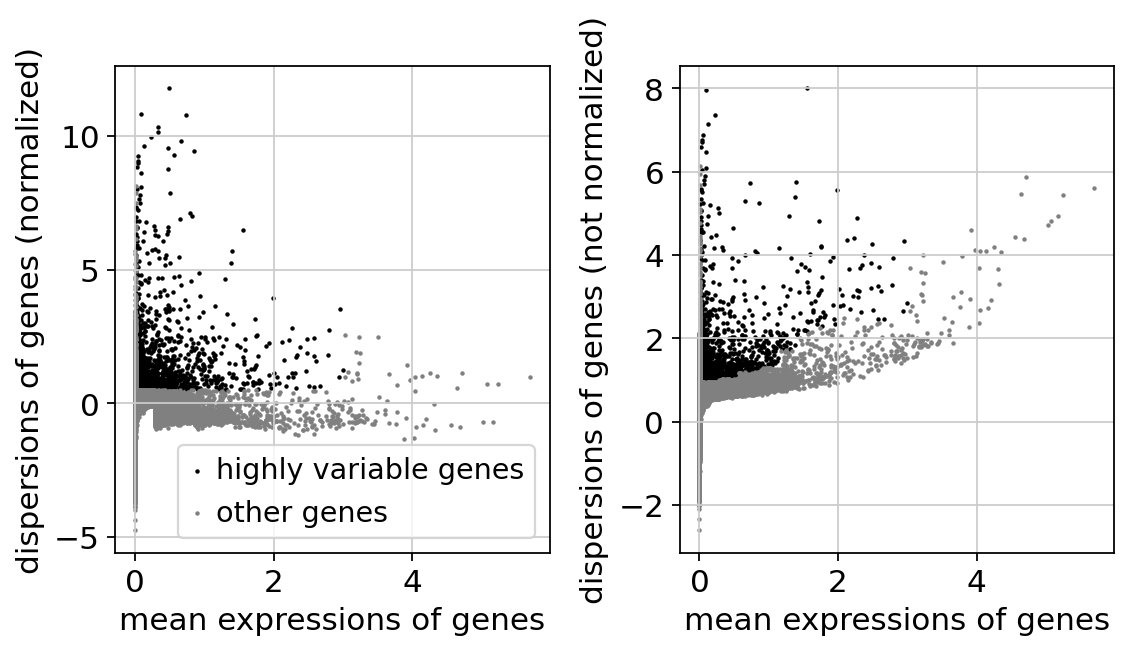

In [12]:
sc.pl.highly_variable_genes(adata)

In [13]:
adata.raw = adata

In [14]:
adata = adata[:, adata.var.highly_variable]

In [15]:
sc.pp.scale(adata, max_value=10)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


Integration with donors and removing batch effects of chemistry

In [16]:
!pip3 install bbknn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 647 kB 4.0 MB/s 
  Created wheel for annoy: filename=annoy-1.17.1-cp37-cp37m-linux_x86_64.whl size=395179 sha256=84c8b5668994842aeecb04aee1ef016dd29c8b203fd1d708b97b939ab9ac7bce
  Stored in directory: /root/.cache/pip/wheels/81/94/bf/92cb0e4fef8770fe9c6df0ba588fca30ab7c306b6048ae8a54
Successfully built annoy


In [17]:
import bbknn

bbknn.ridge_regression(adata, batch_key=['Chemistry'])

computing ridge regression
	finished: `.X` now features regression residuals
	`.layers['X_explained']` stores the expression explained by the technical effect (0:00:01)


Put X_umap in original_X_umap because otherwise, it is going to be overwritten later.

In [18]:
adata.obsm["original_X_umap"] = adata.obsm["X_umap"]

In [19]:
adata

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg'
    obsm: 'X_umap', 'original_X_umap'
    layers: 'X_explained'

Mixture

In [20]:
adata.X

array([[-0.09563154, -0.12665045, -0.21807246, ..., -0.02376303,
        -0.66477964, -1.12220688],
       [-0.09563154, -0.12665045, -0.21807246, ...,  1.75406566,
         0.69887738, -1.12220688],
       [-0.09563154, -0.12665045, -0.21807246, ...,  0.54664674,
         0.09797386, -1.12220688],
       ...,
       [-0.18324198, -0.08415818, -0.30503886, ..., -0.48144163,
        -1.52715502, -0.37457089],
       [-0.18324198, -0.08415818, -0.30503886, ...,  0.13660641,
        -1.52715502, -0.37457089],
       [-0.18324198, -0.08415818, -0.30503886, ...,  0.27921161,
         0.29864582, -0.37457089]])

In [22]:
!git clone https://github.com/eitanrich/torch-mfa.git

fatal: destination path 'torch-mfa' already exists and is not an empty directory.


In [23]:
import sys
sys.path.append("./torch-mfa")

In [24]:
import tensorflow as tf
import mfa

In [21]:
use_highly_variable = True
adata_comp = (
    adata[:, adata.var['highly_variable']] if use_highly_variable else adata
)

In [22]:
present_genes = []
absent_genes = []
for gene in myeloid_genes:
  if gene in adata_comp.var["highly_variable"]:
    present_genes.append(gene)
  else:
    absent_genes.append(gene)
for gene in special_myeloid_genes:
  if gene not in myeloid_genes:
    if gene in adata_comp.var["highly_variable"]:
      present_genes.append(gene)
    else:
      absent_genes.append(gene)
print("Number of genes present:", len(present_genes))
print("Number of genes absent:", len(absent_genes))
print("Genes absent:", absent_genes)

Number of genes present: 36
Number of genes absent: 6
Genes absent: ['CD74', 'HLA-DRA', 'CD14', 'C1QA', 'AIRE', 'CRLF2']


Initialization of mixture of PPCA model

In [136]:
_, features = adata_comp.X.shape
n_components = 15
n_factors = 70
intialization = "kmeans"

model = mfa.MFA(n_components, features, n_factors, init_method=intialization)

In [137]:
import torch

tensor_X = torch.Tensor(adata_comp.X)
tensor_X.shape

torch.Size([51552, 1816])

In [138]:
em_iterations = 100
L = model.fit(tensor_X, max_iterations=em_iterations)

Hello
Random init...
Performing K-means clustering of 51552 samples in dimension 1816 to 15 clusters...
... took 111.46451449394226 sec
Init log-likelihood = -1997.2
Iteration 0/100, train log-likelihood = -1986.9, took 21.4 sec
Iteration 1/100, train log-likelihood = ....., took 13.9 sec
Iteration 2/100, train log-likelihood = ....., took 13.7 sec
Iteration 3/100, train log-likelihood = ....., took 13.8 sec
Iteration 4/100, train log-likelihood = ....., took 13.8 sec
Iteration 5/100, train log-likelihood = -1980.7, took 20.4 sec
Iteration 6/100, train log-likelihood = ....., took 13.9 sec
Iteration 7/100, train log-likelihood = ....., took 13.9 sec
Iteration 8/100, train log-likelihood = ....., took 13.8 sec
Iteration 9/100, train log-likelihood = ....., took 13.8 sec
Iteration 10/100, train log-likelihood = -1979.2, took 20.3 sec
Iteration 11/100, train log-likelihood = ....., took 14.6 sec
Iteration 12/100, train log-likelihood = ....., took 15.1 sec
Iteration 13/100, train log-like

KeyError: ignored

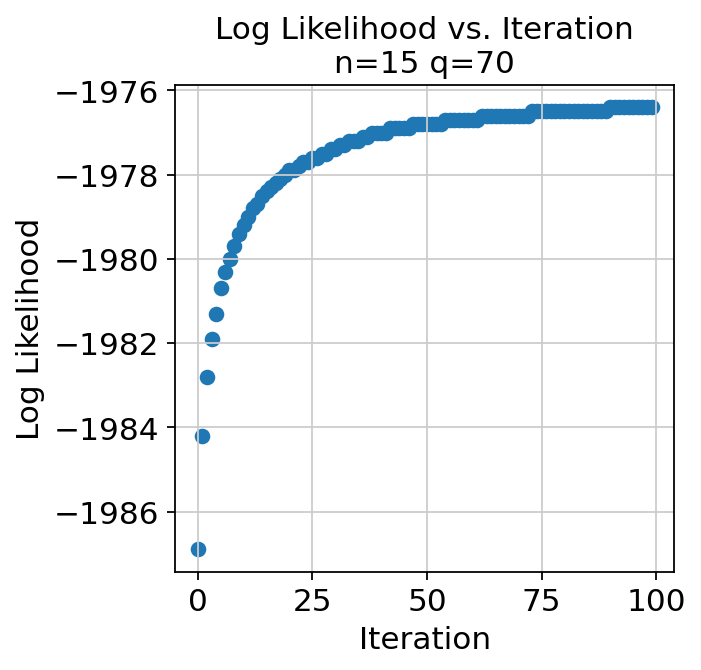

In [202]:
# Display the log likelihood
use_mixture_data = True
if use_mixture_data:
  plt.scatter([i for i in range(0, mixture_data["expectation_maximization_iterations"])], mixture_data["L"])
  plt.xlabel("Iteration")
  plt.ylabel("Log Likelihood")
  plt.title("Log Likelihood vs. Iteration\n" +
            "n=" + str(mixture_data["n_clusters"]) + " q=" + str(mixture_data["latent_dim"]))
  # plt.tight_layout()
  figure_name = "L_" + str(mixture_data["n_clusters"]) + "_" + str(mixture_data["latent_dim"]) + "_" + mixture_data["initialization"] + ".png"
  plt.savefig("./figures/" + figure_name)
  # plt.show()
  # plt.close()
else:
  print(L.shape)
  plt.scatter([i for i in range(1, em_iterations+1)], L)
  plt.xlabel("Iteration")
  plt.ylabel("Log Likelihood")
  plt.title("Log Likelihood vs. Iteration\n" + "n=" + str(n_components) + " q=" + str(n_factors))

  figure_name = "L_" + str(n_components) + "_" + str(n_factors) + "_" + intialization + "_" + str(em_iterations) + ".png"
  plt.tight_layout()
  plt.savefig("./figures/" + figure_name)
  # plt.show()
  # plt.close()

Results of mixture of PPCA

In [143]:
# Convert tensors to arrays
mu = model.MU.numpy()
W = model.A.numpy()
log_sigma2 = model.log_D.numpy()
R = model.responsibilities(tensor_X).numpy()
logR = model.log_responsibilities(tensor_X).numpy()

In [144]:
print(mu.shape)
print(W.shape)
print(log_sigma2.shape)
print(R.shape)
print(logR.shape)

(15, 1816)
(15, 1816, 70)
(15, 1816)
(51552, 15)
(51552, 15)


Save results of expectation maximization algorithm

In [145]:
preprocessing = "scaled"
regressed = True
if use_highly_variable:
  print("Using highly variable")
  preprocessing = "highly variable genes and " + preprocessing 
if regressed:
  print("Regressed out chemistry")
  preprocessing = preprocessing + " regressed out chemistry"

mixture_pca = {"dataset": "myeloid",
               "n_clusters": n_components,
               "latent_dim": n_factors,
               "initialization_n_iterations": 300, # default in mfa.py
               "expectation_maximization_iterations": em_iterations,
               "mu": mu.tolist(),
               "W": W.tolist(),
               "log_sigma2": log_sigma2.tolist(),
               "L": L.tolist(),
               "R": R.tolist(),
               "log_R": logR.tolist(),
               "adata_comp": use_highly_variable,
               "adata_comp.shape": adata_comp.shape,
               "preprocessing": preprocessing,
               "present_genes": present_genes,
               "absent_genes": absent_genes}

save_json = True
dir_path = "drive/MyDrive/immune_cell_dataset/mixture_files/"
specific_mixture = str(n_components) + "_" + str(n_factors)

# Marking that using highly variable genes
if use_highly_variable:
  specific_mixture = specific_mixture + "_variable"
# Marking that regressed out effects of Chemistry
if regressed:
  specific_mixture = specific_mixture + "_regressed"
# Marking that used kmeans to intialize as opposed to random
specific_mixture = specific_mixture + "_" + intialization

if save_json:
  print("Saving mixture PPCA json file")
  with open("mixture_ppca_"+specific_mixture+".json", "w") as json_file:
    json.dump(mixture_pca, json_file)
    json_file.close()

Using highly variable
Regressed out chemistry
Saving mixture PPCA json file


Use previous results of expectation maximization algorithm

In [45]:
# Might delete this cell if already saving information in a JSON file on Google Drive

# desired_clusters = 3
# desired_latent_dim = 50
dir_path = "drive/MyDrive/immune_cell_dataset/mixture_files_regressed/"
# mixture_ppca_name = "mixture_ppca_" + str(desired_clusters) + "_" + str(desired_latent_dim) + ".json"

# The first number is the numer of components
# The second number is the number of factors
# The third item variable means that the mixture of ppca was run on the highly variable genes
# The fourth item means the effects of Chemistry were regressed out
# The fifth item kmeans means that the initalization for the mixture of ppca was kmeans
mixture_ppca_name = "mixture_ppca_11_70_variable_regressed_kmeans.json"
f = open(os.path.join(dir_path, mixture_ppca_name))
mixture_data = json.load(f)
convert = ["mu", "W", "log_sigma2", "L", "R", "log_R"]
for param in convert:
  mixture_data[param] = np.array(mixture_data[param])
# adata_comp.write("./adata_comp_immune.h5ad")

Evaulating PCs

In [46]:
def observation_to_latent(data, W, R):
  """
  Transform observed data to latent representation using cluster assignment and weights for that cluster.
  Assumes the data is already centered.
  """
  clusters = R.argmax(axis=1)
  
  n, _ = data.shape
  _, q = W[0,:,:].shape
  print(n)
  print(q)

  latent_data = np.zeros((n, q))
  for i in range(0, n):
    latent_data[i,:] = np.dot(W[clusters[i],:,:].T,data[i,:])
  return latent_data


# latent_data = observation_to_latent(adata_comp.X, W, clusters)
# print("Shape of the latent data:", latent_data.shape)
# print("Shape of mu:", mu.shape)
# print_clusters(latent_data, clusters, mu)
# print(latent_data)
# print(adata_comp.obsm['original_X_pca'])

Generating X_pca

In [47]:
use_mixture_data = True
if use_mixture_data:
  print("Using json file")
  print("n_clusters:", mixture_data["n_clusters"])
  print("latent_dim:", mixture_data["latent_dim"])
  latent_data = observation_to_latent(adata_comp.X, mixture_data["W"], mixture_data["R"])
else:
  print("n_clusters:", n_clusters)
  print("latent_dim:", latent_dim)
  latent_data = observation_to_latent(adata_comp.X, W, R)

Using json file
n_clusters: 11
latent_dim: 70
51552
70


In [48]:
adata_comp.obsm['X_pca'] = latent_data

In [49]:
latent_data.shape
adata_comp.X.shape
adata_comp.obsm['X_pca'].shape
# adata_comp

(51552, 70)

Top Loadings

In [28]:
def get_top_pca_loadings(adata_object, W, component, num_select=15):
  """
  adata_object: The adata object.
  W: The weights.
  component: The index of the principal component to look at. E.g., for the first principal component,
    component should be 0.
  num_select: Number of top and bottom to choose. E.g., 15 will get 30 values back in total.
    The top 15 and the bottom 15.
  An alternative way to get the top loadings as opposed to visualizing it on the graph.
  """
  # Get the indices of the array if it were to be sorted
  sorted_indices = np.argsort(W[:,component])
  top = sorted_indices[-1:-num_select-1:-1]
  bottom = sorted_indices[0:num_select]
  # print(W[:,component][top])
  # print(W[:,component][bottom])
  top_loadings = adata_object.var["highly_variable"].iloc[top]
  bottom_loadings = adata_object.var["highly_variable"].iloc[bottom]
  
  return top_loadings, bottom_loadings 

In [29]:
def get_absolute_top_pca_loadings(adata_object, W, component, num_select=15):
  """
  adata_object: The adata object.
  W: The weights.
  component: The index of the principal component to look at. E.g., for the first principal component,
    component should be 0.
  num_select: Number of top. E.g., 15 will get 15 loadings back in total.
  Gets the num_select loadings with the highest absolute value.
  """
  # Get the absolute values of the component W
  absolute_component = np.absolute(W[:,component])
  # Get the indices of the array if it were to be sorted
  sorted_indices = np.argsort(absolute_component)
  top = sorted_indices[-1:-num_select-1:-1]
  top_loadings = adata_object.var["highly_variable"].iloc[top]
  
  return top_loadings 

In [30]:
def get_all_genes(adata_object, W, num_pcs, present_genes, num_select=15, use_absolute=True):
  """
  adata_object: The adata object.
  W: The weights.
  num_pcs: The number of principal components to look for.
  present_genes: The genes to check the presence of.
  num_select: The number of loadings to get. 2*num_select for use_absolute=False.
    num_select for use_absolute=True.
  use_absolute: True if you only want the top values. False if you want to get the bottom and the top.

  Gets the top genes and bottom genes for each principal component then gets the ones
  that are present in present_genes and returns them. Does this for num_pcs.
  """
  
  pc_present = []
  for i in range(0, num_pcs):
    
    if not use_absolute:
      # Get top genes and bottom genes of each principal component
      top, bottom = get_top_pca_loadings(adata_object, W, i, num_select)
    else:
      top = get_absolute_top_pca_loadings(adata_object, W, i, num_select)
    
    # Add in the top genes
    for gene in top.index:
      if gene in present_genes and gene not in pc_present:
        pc_present.append(gene)
    if not use_absolute:
      # Add in the bottom genes
      for gene in bottom.index:
        if gene in present_genes and gene not in pc_present:
          pc_present.append(gene)
  return pc_present

Demonstration of above functions

Index(['CHIT1', 'OTOA', 'CFB', 'CD274', 'TGM2'], dtype='object')
Index(['ITIH5', 'IGFBP2', 'VGLL3', 'FOLR3', 'VMO1'], dtype='object')


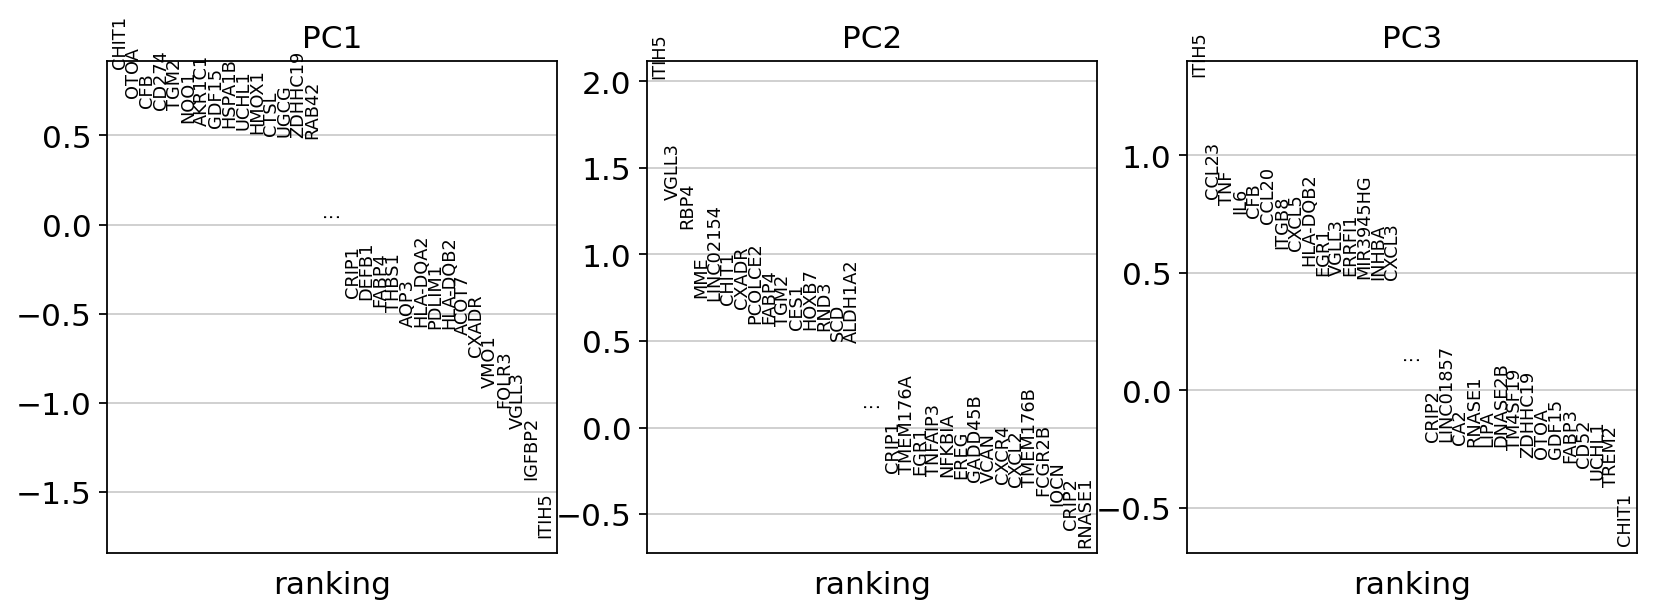

In [31]:
# 2 corresponds to component 3 for pca_loadings() because 2 is the index of the component
top, bottom = get_top_pca_loadings(adata_comp, mixture_data["W"][2], 0, num_select=5)
print(top.index)
print(bottom.index)
for gene in top.index:
  if gene in present_genes:
    print(gene)
for gene in bottom.index:
  if gene in present_genes:
    print(gene)

adata_comp.varm["PCs"] = mixture_data['W'][2]
sc.pl.pca_loadings(adata_comp, components='1,2,3')

Selecting PCs using above functions

Number of loadings: 10
use_absolute: True


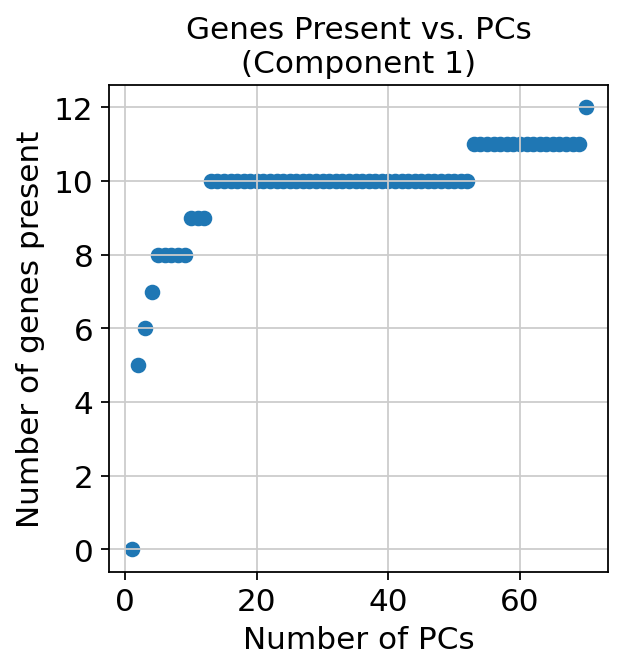

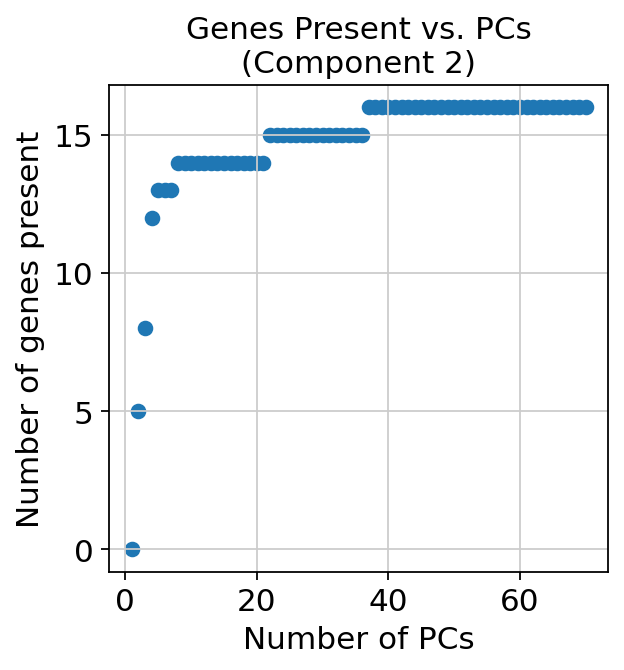

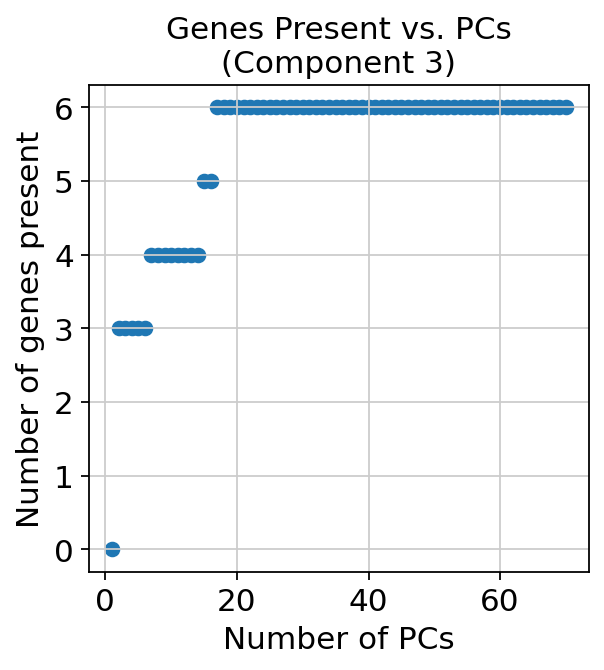

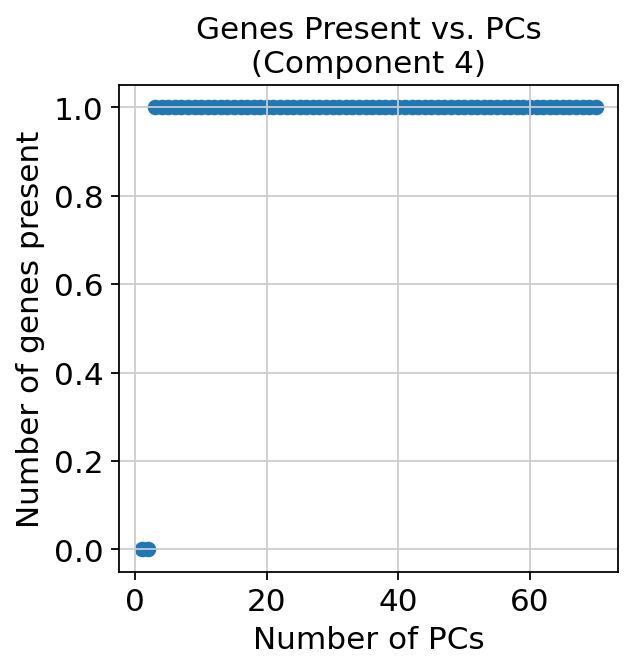

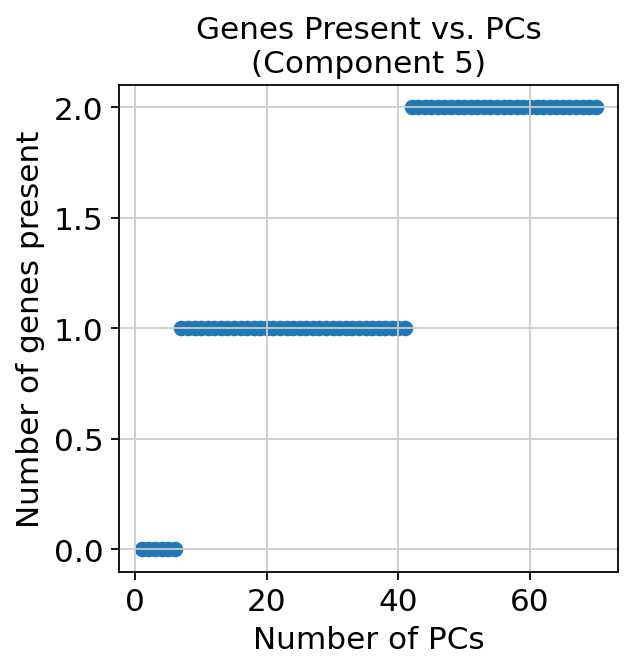

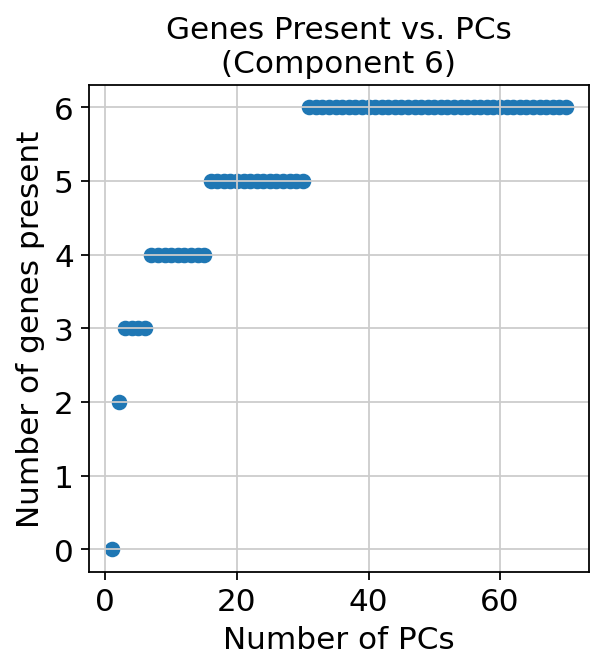

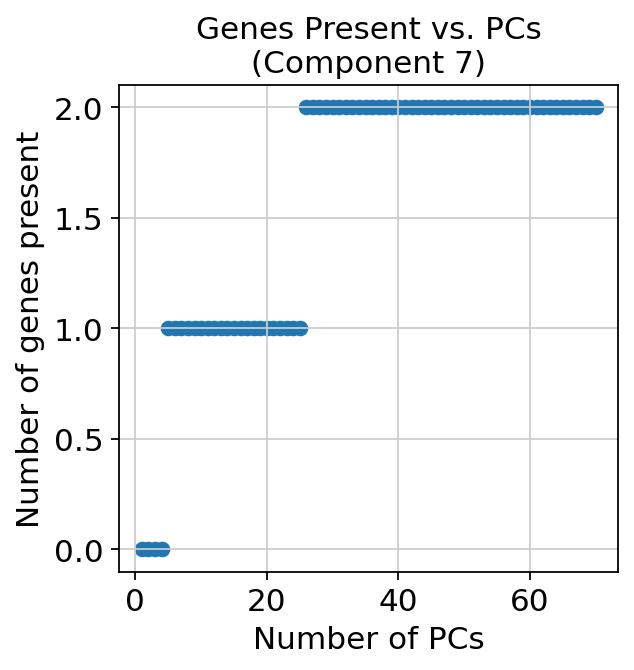

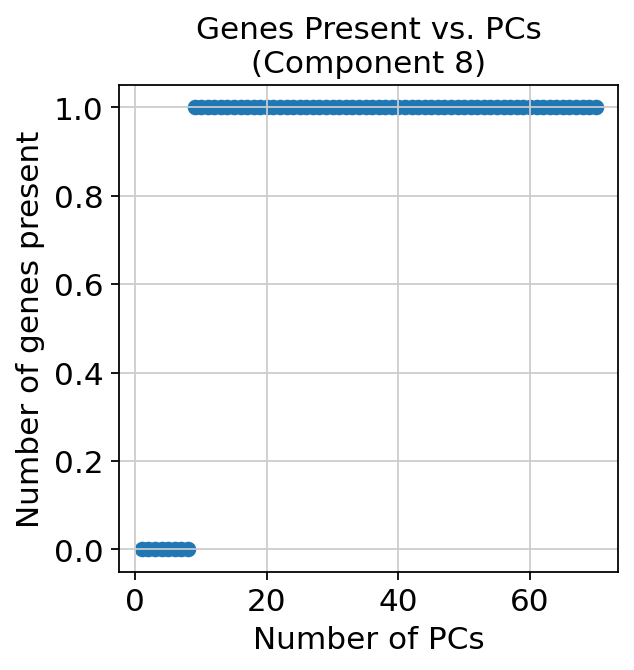

In [41]:
num_select = 10
use_absolute = True
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
# Go over each component
for k in range(0, mixture_data["n_clusters"]):
  
  plt.scatter([i for i in range(1, mixture_data["latent_dim"]+1)],
              [len(get_all_genes(adata_comp, mixture_data["W"][k], i, present_genes, num_select=num_select, use_absolute=use_absolute))
              for i in range(0, mixture_data["latent_dim"])])
  plt.xlabel("Number of PCs")
  plt.ylabel("Number of genes present")
  plt.title("Genes Present vs. PCs\n(Component " + str(k+1) + ")")
  plt.show()
  plt.close()

In [50]:
num_select = 10
use_absolute = True
num_pcs = 50
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
print("Number of principal components:", num_pcs)
print("\n")

overall_genes = []
# Go over each component
for k in range(0, mixture_data["n_clusters"]):
  
  print("Component:", k+1)
  selected_genes = get_all_genes(adata_comp,
                                 mixture_data["W"][k],
                                 num_pcs,
                                 present_genes,
                                 num_select=num_select,
                                 use_absolute=use_absolute)
  
  selected_types = []
  for gene in selected_genes:
    if gene in special_myeloid_genes:
      selected_types.append(special_myeloid_genes[gene])
    else:
      selected_types.append("-")
  
    if gene not in overall_genes:
      overall_genes.append(gene)
  
  print("Number of selected genes:", len(selected_genes))
  print("Selected genes:", selected_genes)
  print("Selected gene types:", selected_types)
  print("\n")  

Number of loadings: 10
use_absolute: True
Number of principal components: 50


Component: 1
Number of selected genes: 1
Selected genes: ['CLU']
Selected gene types: ['-']


Component: 2
Number of selected genes: 2
Selected genes: ['SDS', 'MKI67']
Selected gene types: ['-', '-']


Component: 3
Number of selected genes: 4
Selected genes: ['SPP1', 'TREM2', 'BHLHE41', 'CCL2']
Selected gene types: ['-', ('macrophage', 'alveolar'), '-', ('macrophage', 'intermediate')]


Component: 4
Number of selected genes: 12
Selected genes: ['LAMP3', 'CCR7', 'FSCN1', 'CLEC9A', 'IDO1', 'XCR1', 'DNASE1L3', 'CD1C', 'PKIB', 'CLEC10A', 'EBI3', 'PDLIM4']
Selected gene types: [('dendritic', 'migDC'), ('dendritic', 'migDC'), '-', ('dendritic', 'DC1'), '-', ('dendritic', 'DC1'), '-', ('dendritic', 'DC2'), '-', ('dendritic', 'DC2'), ('dendritic', 'migDC'), ('dendritic', 'migDC')]


Component: 5
Number of selected genes: 1
Selected genes: ['CD3E']
Selected gene types: ['-']


Component: 6
Number of selected genes: 6

In [34]:
overall_absent = []
for gene in present_genes:
  if gene not in overall_genes:
    overall_absent.append(gene)

print("Number of total present genes in highly variable genes:", len(present_genes))
print("Number of total absent genes in highly variable genes:", len(absent_genes))
print("Number of genes present across all components:", len(overall_genes))
print("Number of genes absent across all components:", len(overall_absent))
print("Genes absent:", overall_absent)

Number of total present genes in highly variable genes: 36
Number of total absent genes in highly variable genes: 6
Number of genes present across all components: 34
Number of genes absent across all components: 2
Genes absent: ['GPNMB', 'SLC40A1']


Performing Clustering

Number of loadings: 10
use_absolute: True
Number of principal components: 70




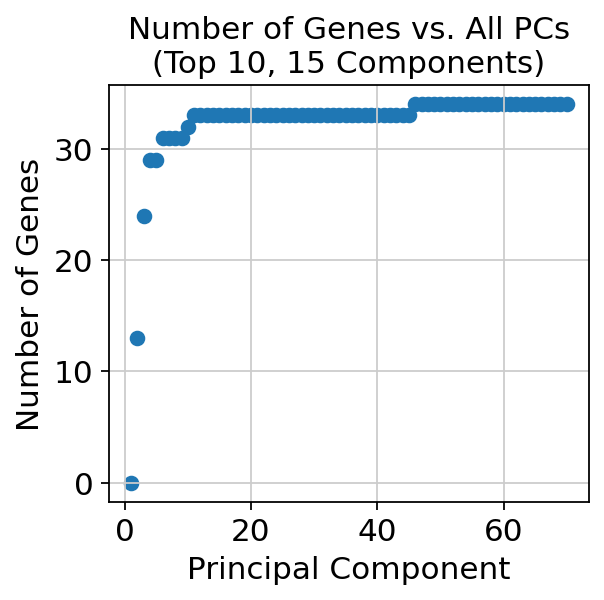

Number of genes with 40 components: 33
Number of genes with 70 components: 34


In [35]:
num_select = 10
use_absolute = True
num_pcs = 70
print("Number of loadings:", num_select)
print("use_absolute:", use_absolute)
print("Number of principal components:", num_pcs)
print("\n")

pc_num_genes = {}
for i in range(0, num_pcs):
  pc_genes = []
  # Go over each component
  for j in range(0, mixture_data["n_clusters"]):
    selected_genes = get_all_genes(adata_comp,
                                  mixture_data["W"][j],
                                  i,
                                  present_genes,
                                  num_select=num_select,
                                  use_absolute=use_absolute)
    for gene in selected_genes:
      if gene not in pc_genes:
        pc_genes.append(gene)

  pc_num_genes[i+1] = len(pc_genes)

plt.scatter([i for i in range(1, num_pcs+1)], [pc_num_genes[i] for i in range(1, num_pcs+1)])
plt.title("Number of Genes vs. All PCs\n(Top "+ str(num_select) + ", 15 Components)")
plt.xlabel("Principal Component")
plt.ylabel("Number of Genes")
plt.tight_layout()
plt.savefig("15_70_mixture_genes.png")
plt.show()
plt.close()

print("Number of genes with 40 components:", pc_num_genes[40])
print("Number of genes with " + str(num_pcs) + " components:", pc_num_genes[num_pcs])

Computing the neighborhood graph

In [222]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'leiden', 'louvain'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'neighbors', 'umap', 'leiden', 'louvain', 'Donor_colors', 'Chemistry_colors', 'leiden_colors', 'louvain_colors', 'Majority_voting_CellTypist_colors'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'X_explained'
    obsp: 'distances', 'connectivities'

In [38]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.0 MB/s 
     |████████████████████████████████| 3.2 MB 36.6 MB/s 


In [39]:
!pip install louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.8 MB/s 


In [334]:
sc.pp.neighbors(adata_comp, n_neighbors=40, n_pcs=50)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


In [405]:
# Alternative to sc.pp.neighbors
# Defaults are 3 neighbors within batch and 50 pcs
bbknn.bbknn(adata_comp, batch_key="Donor", n_pcs=50, neighbors_within_batch=3)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:15)


Clustering the neighborhood graph

In [406]:
sc.tl.leiden(adata_comp, resolution=0.4)

running Leiden clustering
    finished: found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:55)


In [374]:
sc.tl.louvain(adata_comp, resolution=0.8)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:20)


Embedding the neighborhood graph

In [407]:
sc.tl.umap(adata_comp)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:12)


Visualizing the clusters

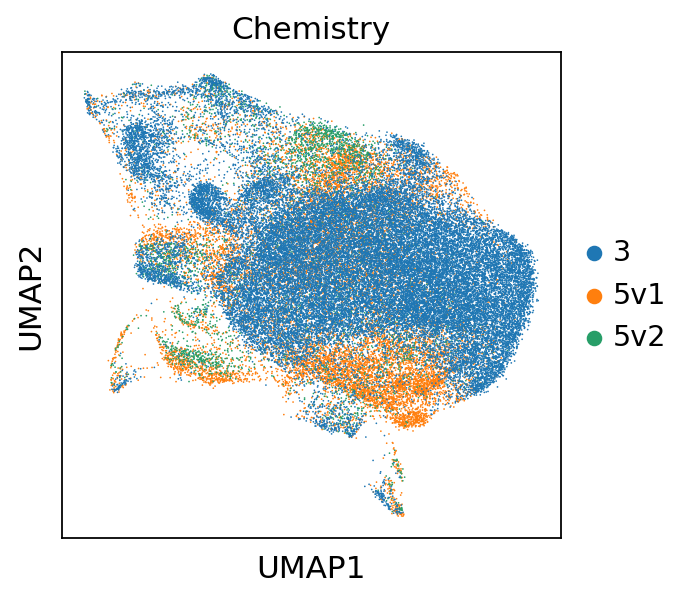

In [416]:
sc.pl.umap(adata_comp, color='Chemistry', use_raw=False, save="_15_70_kmeans_regressed_bbknn_3_50_chemistry.png")

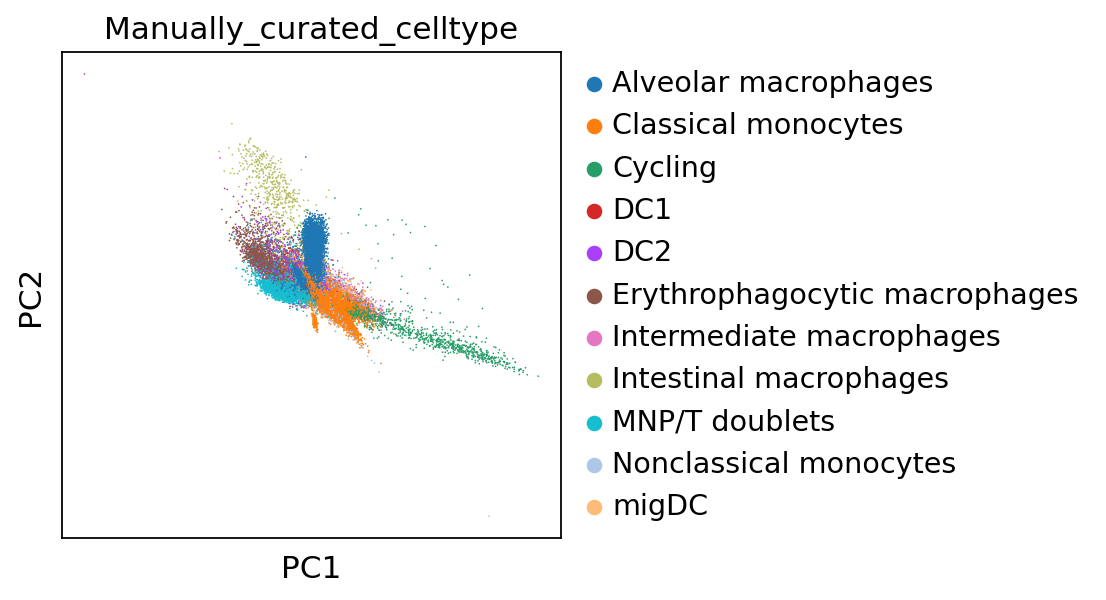

In [ ]:
sc.pl.pca(adata_comp, color=['Manually_curated_celltype'], save="_mixture_regressed_3_50_manually.png")

K-means Clustering

In [246]:
# K-means
from sklearn.cluster import KMeans

max_clusters = 30
num_PCs = 50
distortions = np.zeros(max_clusters)
labels = []
for i in range(1, max_clusters+1):
  X_pca = adata_comp.obsm["X_pca"][:, 0:num_PCs]
  print(X_pca.shape)
  kmeans = KMeans(n_clusters=i, random_state=0, n_init=20, max_iter=500, tol=1e-04).fit(X_pca)
  
  distortions[i-1] = kmeans.inertia_
  labels.append(kmeans.labels_.astype(str))

(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)
(51552, 50)


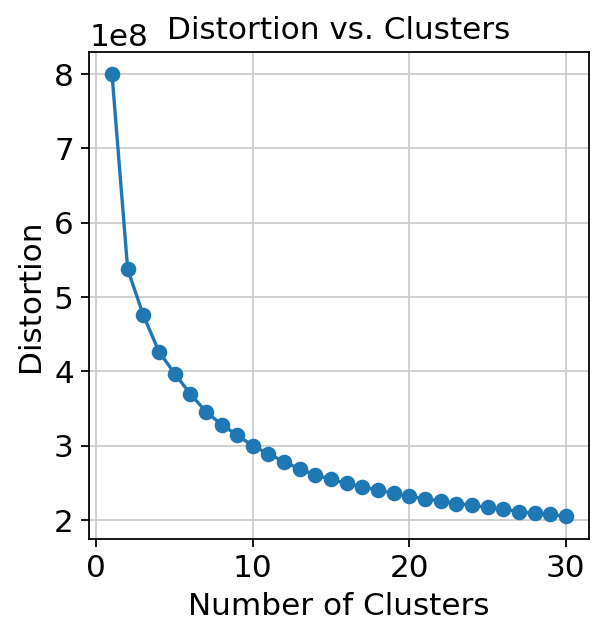

In [247]:
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Distortion vs. Clusters")
plt.savefig("./figures/kmeans_elbow_plot_mixture_kmeans_regressed_15_70_30_50.png")
# plt.show()
# plt.close()

In [248]:
adata_comp.obsm['X_umap'] = adata_comp.obsm['original_X_umap']

In [265]:
adata_comp.obs['kmeans8'] = labels[7]
adata_comp.obs['kmeans11'] = labels[10]
# Below pick the label that provides the kink, k-1
adata_comp.obs['kmeans12'] = labels[11]

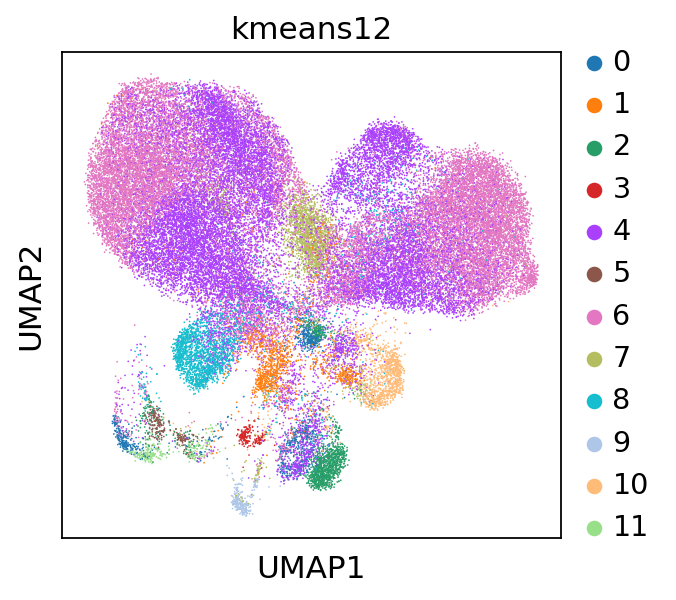

In [266]:
sc.pl.umap(adata_comp, color=['kmeans12'], save="_mixture_regressed_15_70_kmeans_12_50.png")

Soft Clustering from PPCA

In [236]:
adata_comp.obsm['X_umap'] = adata_comp.obsm['original_X_umap']

In [237]:
mixture_clusters = mixture_data["R"].argmax(axis=1).astype(str)

In [238]:
adata_comp.obs["mixture_clusters"] = mixture_clusters

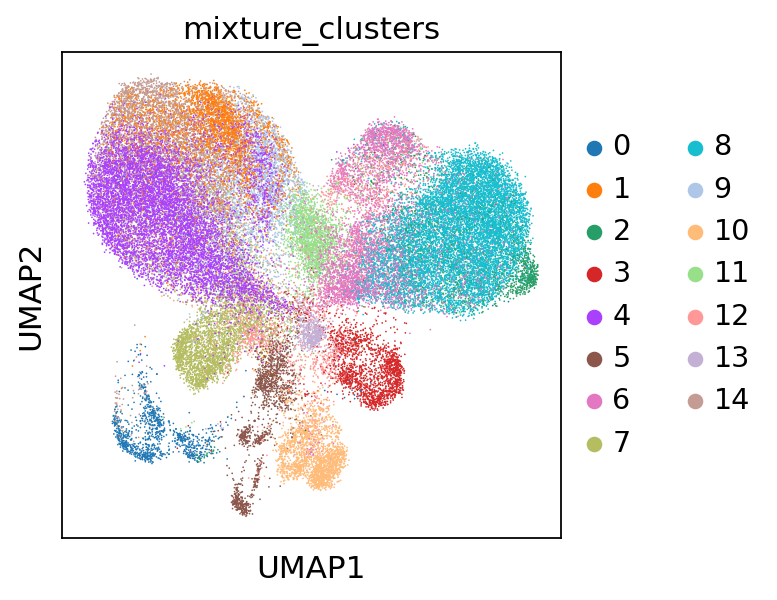

In [239]:
sc.pl.umap(adata_comp, color=['mixture_clusters'], save="_mixture_regressed_15_70_kmeans_mixture_clusters.png")

Compute clustering metrics

Compute ARI

In [91]:
adata_comp

AnnData object with n_obs × n_vars = 51552 × 1816
    obs: 'Organ', 'Donor', 'Chemistry', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Manually_curated_celltype', 'mixture_clusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Manually_curated_celltype_colors', 'hvg', 'neighbors', 'umap', 'Donor_colors', 'Chemistry_colors', 'mixture_clusters_colors'
    obsm: 'X_umap', 'original_X_umap', 'X_pca'
    layers: 'X_explained'
    obsp: 'distances', 'connectivities'

In [409]:
from sklearn.metrics import adjusted_rand_score


true_labels = ["Majority_voting_CellTypist", "Manually_curated_celltype"]
clustering = "leiden"
for label in true_labels:
  print("ARI", label, clustering, adjusted_rand_score(adata_comp.obs[label], adata_comp.obs[clustering]))

ARI Majority_voting_CellTypist leiden 0.054022933211001475
ARI Manually_curated_celltype leiden 0.13345117740833498


In [410]:
from sklearn.metrics import adjusted_mutual_info_score

for label in true_labels:
  print("AMI", label, clustering, adjusted_mutual_info_score(adata_comp.obs[label], adata_comp.obs[clustering]))

AMI Majority_voting_CellTypist leiden 0.1529167811368439
AMI Manually_curated_celltype leiden 0.3143645791620972


In [411]:
from sklearn.metrics import normalized_mutual_info_score

for label in true_labels:
  print("NMI", label, clustering, normalized_mutual_info_score(adata_comp.obs[label], adata_comp.obs[clustering]))

NMI Majority_voting_CellTypist leiden 0.15326378821522066
NMI Manually_curated_celltype leiden 0.3147082920292572


In [28]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, normalized_mutual_info_score

print(adjusted_rand_score([1, 1, 0, 1], ["A", "A", "B", "A"]))
print(adjusted_mutual_info_score([1, 1, 0, 1], ["A", "A", "A", "B"]))
print(normalized_mutual_info_score([1, 1, 0, 1], ["A", "A", "A", "B"]))

1.0
-0.333333333333333
0.15106563978903276
